Professors address students’ questions based on their understanding of the subject matter. Sometimes a question can be complex and would require further research. Professors send teaching assistants to a library or instruct them to browse through hundreds of manuscripts in order to find relevant information along with citations.

Like a good professor, Large Language Models (LLMs) can respond to a lot of questions pertaining to a certain subject. However, to deliver authoritative answers that can cite sources, they would require an assistant to provide supplementary information.

Retrieval Augmented Generation is a technique that combines the capabilities of both retrieval-based models and generative models to enhance the quality of output response. The framework enabling AI developers to improve model performance by augmenting prompts with users data outside of the foundation model lead to a more trustworthy information coming out of LLM. According to the 2023 Retool Report, an impressive 36.2% of enterprise LLM use cases now employ RAG technology. RAG brings the power of LLMs to structured and unstructured data, making enterprise information retrieval more effective and efficient than ever.

Breaking down RAG functionalities:

To understand the RAG pipeline, let’s break it down into it’s two major components as mentioned below:

Retrieval models: Retrieval models are a type of language model that focus on finding relevant information from a dataset, in response to a given query. These models are usually trained on vast knowledge database to produce meaningful and context-specific results. The models utilize fundamental Natural Language Processing algorithms such as Neural network embeddings, BM25 (Best Match 25), TF-IDF (Term Frequency — Inverse Document Frequency). These algorithms ranks documents based on either their similarity in the vector space or term frequency. Retrieval models have been very useful in finding accurate and precise information from the text documents, but lack the ability of generating innovative or creative contents.
Generative models: On the contrary, Generative models are designed to generate new contents based on given prompts and texts. All the widely popular LLMs use a large amount of training data to learn the patterns and structure of natural language. Despite the fact that the generative models can produce creative texts or images, they may exhibit factual inaccuracy or relevance to specific context.
Here comes Retrieval-augmented generation technology which combines the power of both retrieval-based models and generative-based models to enhance the quality and relevance of the model generated text, making enterprise information retrieval more effective and efficient than ever and alleviate hallucination issues to certain extent.

RAG workflow:
The core of RAG process is an LLM that supported by a collection of enterprise documents coupled with a sustainable infrastructure to improve information retrieval and answer construction. The RAG pipeline constantly queries the database to retrieve relevant information based on the questions asked by the users. The continues query retrieval process augment the decision-making and information access for an enterprise-standard AI tool. See the picture below manifesting the high-level overview of the RAG system integrated with internal database engine.

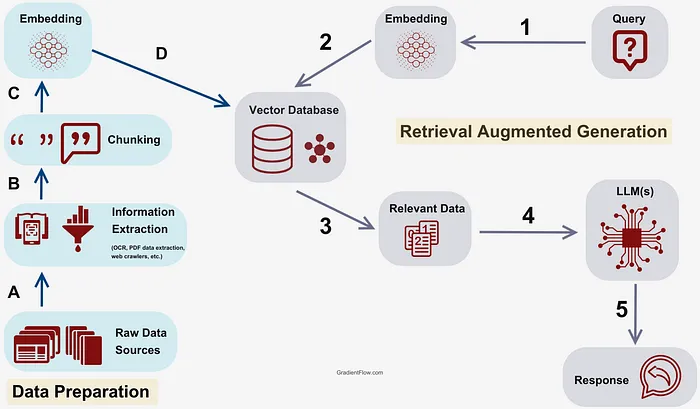

Applications:
Retrieval-augmented generation technology can be applicable for various industry use cases as mentioned below:

1. Advanced question-answering systems
A healthcare organization can use RAG systems to develop a system that address primitive medical queries by retrieving information from medical literature and generating precise responses. This will benefit medical professionals as they do not require to attend patients for trivial medical matters.

2. Content creation and summarization
RAG systems can streamline content creation process by retrieving relevant information from diverse sources, aiding journalists and authors in developing high quality articles/reports based on specific prompts or texts.

3. Conversational agents and chatbots
RAG systems can amplify the capability of conversational chatbots, allowing them to generate accurate and precise responses for the users.

4. Educational tools and resources
RAG systems, integrated with educational apps, have potential to enhance learning experience. They can improve the tailored explanations, quality of the exam questionnaire and provide more relevant learning contents to improve the overall learning journey for the users.

5. Legal research and analysis
RAG systems can develop a robust legal search process, powered by the underlying LLM models which are constantly retrieving relevant legal information. The system can aid legal professionals in drafting legal documents, analyzing cases, and formulating arguments with high accuracy.

In [1]:
!pip install sentence_transformers pypdf faiss-gpu
!pip install langchain langchain-openai

from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chat_models import ChatOpenAI
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
from langchain.chains import create_retrieval_chain

# For openai key
import os
os.environ["OPENAI_API_KEY"] = "sk-proj-XYmgnxmpJ0tA3U5DAvCvT3BlbkFJRZGSlU43QGXuW88Euu9j"

ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu


     ---------------------------------------- 46.7/46.7 kB 1.1 MB/s eta 0:00:00
     ------------------------------------- 798.7/798.7 kB 12.5 MB/s eta 0:00:00
     -------------------------------------- 328.6/328.6 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: tiktoken
    Found existing installation: tiktoken 0.4.0
    Uninstalling tiktoken-0.4.0:
      Successfully uninstalled tiktoken-0.4.0
  Attempting uninstall: openai
    Found existing installation: openai 0.27.9
    Uninstalling openai-0.27.9:
      Successfully uninstalled openai-0.27.9


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandasai 1.2.10 requires openai<0.28.0,>=0.27.5, but you have openai 1.35.15 which is incompatible.
pandasai 1.2.10 requires pydantic<2,>=1, but you have pydantic 2.8.2 which is incompatible.


In [3]:
# load a PDF  
loader = PyPDFLoader("qlore_paper.pdf")
documents = loader.load()

In [4]:
# Split text 
text = RecursiveCharacterTextSplitter().split_documents(documents)

In [7]:
# Load embedding model
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en-v1.5", 
encode_kwargs={"normalize_embeddings": True})

ImportError: Could not import sentence_transformers python package. Please install it with `pip install sentence-transformers`.

In [6]:
!pip install sentence-transformers

In [8]:
!pip install --upgrade --quiet  sentence_transformers

In [9]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-small-en"
model_kwargs = {"device": "cpu"}
encode_kwargs = {"normalize_embeddings": True}
hf = HuggingFaceBgeEmbeddings(
    model_name=model_name, model_kwargs=model_kwargs, encode_kwargs=encode_kwargs
)

ImportError: Could not import sentence_transformers python package. Please install it with `pip install sentence_transformers`.

In [11]:
from langchain.embeddings import OpenAIEmbeddings

from langchain import embeddings
#persist_directory = 'db'

embedding = OpenAIEmbeddings()

C:\ProgramData\Anaconda3\lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [12]:
# Create a vectorstore
vectorstore = FAISS.from_documents(text, embedding)

# Save the documents and embeddings
vectorstore.save_local("vectorstore.db")

In [13]:
# Create retriever
retriever = vectorstore.as_retriever()

In [14]:
# Load the llm 
llm = ChatOpenAI(model_name="gpt-3.5-turbo")

# Define prompt template
template = """
You are an assistant for question-answering tasks.
Use the provided context only to answer the following question:

<context>
{context}
</context>

Question: {input}
"""

# Create a prompt template
prompt = ChatPromptTemplate.from_template(template)

# Create a chain 
doc_chain = create_stuff_documents_chain(llm, prompt)
chain = create_retrieval_chain(retriever, doc_chain)

C:\ProgramData\Anaconda3\lib\site-packages\langchain_core\_api\deprecation.py:139: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [15]:
# User query 
response = chain.invoke({"input": "what is Qlora?"})

# Get the Answer only
response['answer']

'QLORA is an efficient finetuning approach that reduces memory usage for finetuning large language models on GPUs while maintaining full performance. It involves backpropagating gradients through a frozen, 4-bit quantized pretrained language model into Low Rank Adapters (LoRA) to achieve state-of-the-art results on benchmarks like Vicuna.'

##### LlamaIndex
Step 1: Start by installing and loading all the necessary libraries from llamaIndex.

In [16]:
! pip install -U llama_hub llama_index pypdf

from llama_index import SimpleDirectoryReader
from llama_index import Document
from llama_index.node_parser import SimpleNodeParser
from llama_index.schema import IndexNode
from llama_index.llms import OpenAI
from llama_index import ServiceContext
from llama_index import VectorStoreIndex
from llama_index.query_engine import RetrieverQueryEngine

# For openai key
import os
os.environ["OPENAI_API_KEY"] = "sk-proj-XYmgnxmpJ0tA3U5DAvCvT3BlbkFJRZGSlU43QGXuW88Euu9j"

     -------------------------------------- 103.9/103.9 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 295.7/295.7 kB 4.5 MB/s eta 0:00:00
  Using cached retrying-1.3.4-py3-none-any.whl (11 kB)
     ---------------------------------------- 56.5/56.5 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 15.5/15.5 MB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 371.6/371.6 kB 7.7 MB/s eta 0:00:00
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached PyYAML-6.0.1-cp39-cp39-win_amd64.whl (152 kB)
     ---------------------------------------- 1.6/1.6 MB 9.5 MB/s eta 0:00:00
     -------------------------------------- 146.8/146.8 kB 4.4 MB/s eta 0:00:00
     -------------------------------------- 147.9/147.9 kB 4.4 MB/s eta 0:00:00
  Created whee

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~aml\\_yaml.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'llama_index'

### Advanced RAG Implementation using LangChain and LlamaIndex
The problem with the basic RAG technique is that, as document size increases, embeddings become larger and more complex, which can reduce the specificity and contextual meaning of a document. To solve this problem, we use the advanced RAG technique called Parent Document Retriever.

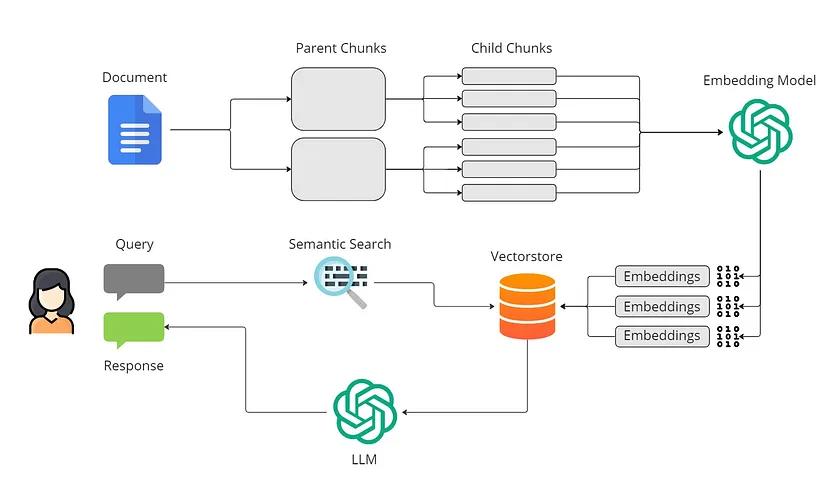

Parent Document Retriever creates small and more accurate embeddings while retaining the contextual meaning of large documents. Parent document retriever helps LLM by using details from child documents for accurate retrieval and gaining additional context from parent documents during generation. This makes language models better at providing detailed and comprehensive answers.

In [17]:
# split pages content
from langchain.text_splitter import RecursiveCharacterTextSplitter

# create the parent documents - The big chunks
parent_splitter = RecursiveCharacterTextSplitter(chunk_size=2000)

# create the child documents - The small chunks
child_splitter = RecursiveCharacterTextSplitter(chunk_size=400)

# The storage layer for the parent chunks
from langchain.storage import InMemoryStore
store = InMemoryStore()

In [20]:
# create vectorstore using Chromadb
from langchain.vectorstores import Chroma
vectorstore = Chroma(collection_name="split_parents", embedding_function=embedding)

In [21]:
# create retriever
from langchain.retrievers import ParentDocumentRetriever
retriever = ParentDocumentRetriever(
    vectorstore=vectorstore,
    docstore=store,
    child_splitter=child_splitter,
    parent_splitter=parent_splitter,
)

# add documents to vectorstore
retriever.add_documents(documents)

In [22]:
# User query 
response = chain.invoke({"input": "what is Qlora?"})

# Get the Answer only
response['answer']

'QLORA is an efficient finetuning approach that reduces memory usage to finetune a 65B parameter model on a single 48GB GPU while preserving full 16-bit finetuning task performance. It involves backpropagating gradients through a frozen, 4-bit quantized pretrained language model into Low Rank Adapters (LoRA).'

https://medium.com/@prasadmahamulkar/introduction-to-retrieval-augmented-generation-rag-using-langchain-and-lamaindex-bd0047628e2a



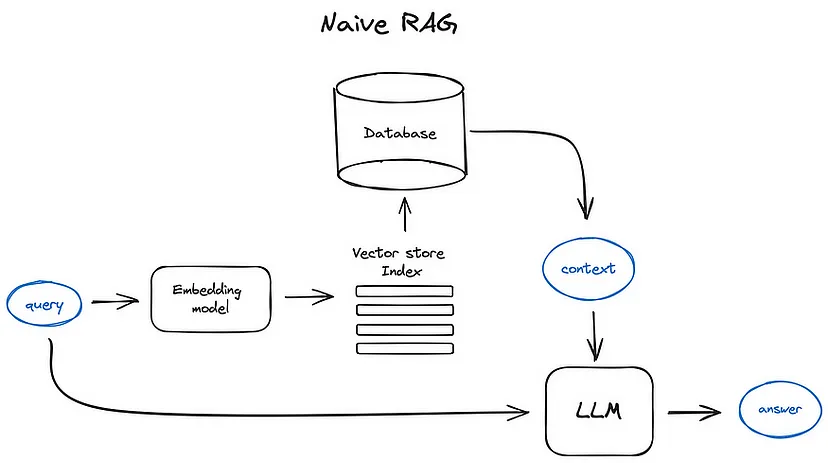